# Team Allocation Simulator
### Group 2
- Nuvaan Murugesan [Nuvaan001@e.ntu.edu.sg]
- Kevin Philips [Kevi0028@e.ntu.edu.sg]
- Miguel Poyaoan Velasco [Miguel001@e.ntu.edu.sg]
- Kumaravel Yashpreethu [Kuma0033@e.ntu.edu.sg]

### Contents

1. Planning and Design:
- Problem decomposition
    - Flow Charts
    - Data Analysis
    - Divide and Conquer

2. Algorithm Evaluation
3. Challenges and Issues
4. Conclusion

# Planning and Design

## General Flow of program and algorithm

<img src="assets/main_flow.png" alt="main_flow" width="20%" height="20%"> 

## Data Analysis

- **Total Number of schools**: 18
- **Total Number of tutorial groups**: 120
- **Total Number of Males**: 2759
- **Total Number of Females**: 3241
- **Average GPA in Males**: 11290.87/2759 = 4.092
- **Average GPA in Females**: 13241.08/3241 = 4.085
- **Average GPA**: 4.089


## Computational Thinking: Divide and Conquer

<img src="assets/DivideStudents.png" alt="DivideStudents" width="50%" height="50%"/>

<img src="assets/AssignStudents.png" alt="AssignStudents" width="50%" height="50%"/>

## Function to read CSV and store data

<img src="assets/input_csv.png" alt="input_csv" width="40%" height="40%">

#### Reading of records.csv file and storing data
1. Extract header into a list for later use
2. Represent each student as a dictionary of their details
3. Append each student dictionary to a list associated with their tutorial group key in stuDict.
##### Return the header list and stuDict, where tutorial groups are keys with lists of student dictionaries as values.

In [97]:
#Import necessary Libraries
from collections import defaultdict, Counter
from matplotlib import pyplot as plt #Only used for Algorithm Evaluation, not used in sorting

team_size=0

def read_from_file(filename):
    header, stuDict = [], defaultdict(list)
    try:
        with open(filename) as stuRecords:
            header = stuRecords.readline().strip().split(',') 
            for line in stuRecords:
                #tg, si, sch, name, gen, GPA
                student = line.split(',') 
                stuDict[student[0]].append({ #Seperating students into their tutorial groups
                    "tg": student[0],
                    "stu_idx": student[1],
                    "sch": student[2],
                    "name": student[3],
                    "gender": student[4],
                    "gpa": float(student[5])
                })
    except FileNotFoundError:
        print("Error in read_from_file(): File does not exist, try again!")
    except PermissionError:
        print("Error in read_from_file(): You do not have permission to this file!")
    except IsADirectoryError:
        print("Error in read_from_file(): Filename is a directory, please input filename!")
    except Exception as e:
        print ("Error in read_from_file(): An Unexpected Error has occured!"+e)
    else:
        return stuDict, header

## Assign teams using students sorted by tutorial groups

<img src="assets/assign_team.png" alt="assign_team" width="40%" height="40%">

#### Assigning Teams with team_size=5 (BASIC)
1. For each tutorial group, sort the students by their schools(keys) in a dictionary sort_sch
2. The value for the schools in sort_sch will be a list of 2 lists [[],[]], first sublist for male and second for females.
3. Then sort the males (ascending) and females(descending) in each school.
4. From each school, alternating the genders and gpa a student will be added into temp_team list until there is 5 students.
5. The students taken are popped from the sublist, and the schools with no students eventually will be deleted from the sort_sch dictionary
6. In the case where the next school does not have the required gender, the algorithm will still fulfill the alternating high and low gpa requirement
7. The team formed is then appended to team_list which is the final return list of all the teams
8. Eventually sort_sch will have no schools left and the algorithm will proceed to sort the next tutorial group in tut_data
##### Return team_list

In [98]:
#What we have: Dict of tutorial group(keys) with list of dict of students from tg(values)
def assign_team(tut_data):
    global team_size
    team_size=5
    team_list = [] #Final return list of all the teams
    
    #Sort students into their respective schools
    for t_grps in tut_data: 
        sort_sch = defaultdict(lambda: [[], []]) #Reset sort_sch dictionary for each tutorial group
        #Sort students into their respective schools (this sorting is contained in each tut grp)
        for student in tut_data[t_grps]: #Access individual student's in each t_grp
            if student['gender'] == "Male":
                sort_sch[student['sch']][0].append(student) #Add male students to 1st sublist
            else:
                sort_sch[student['sch']][1].append(student) #Add female students to 2nd sublist

        #Sort each school by GPA
        for students in sort_sch.values():
            students[0].sort(key = lambda student: student['gpa']) #Sort the male sublist from lowest gpa to highest gpa
            students[1].sort(key = lambda student: student['gpa'], reverse = True) #Sort the female sublist from highest gpa to lowest gpa
            
        temp_team = []
        #Assigning teams
        while sort_sch:
            is_Male = True
            for school in list(sort_sch.keys()):
                #Gen_chooser will choose from boys if even, odd from girls
                if is_Male:
                    chosen_gen = 0
                    is_Male = False #Change to other gender for next student in next iteration
                else:
                    chosen_gen = 1
                    is_Male = True
                #If no more students remove school from the dictionary
                if not sort_sch[school][0] and not sort_sch[school][1]:
                    del sort_sch[school]
                #Team formed break out of loop
                elif len(temp_team) == team_size:
                    break
                elif sort_sch[school][chosen_gen]:
                    temp_team.append(sort_sch[school][chosen_gen][-1])
                    sort_sch[school][chosen_gen].pop()
                #If no more males, choose females and vice-versa
                else:
                    if chosen_gen == 0:
                        temp_team.append(sort_sch[school][1][0])
                        sort_sch[school][1].pop(0)
                    else:
                        temp_team.append(sort_sch[school][0][0])
                        sort_sch[school][0].pop(0)

            if len(temp_team) == team_size:
                # Add each team to overall team list and clear the temporary team
                team_list.append(temp_team)
                temp_team = []
                
    return team_list

### Assigning Teams with variable team_size [4 to 10] (ENHANCED)

<img src="assets/assign_team_(A).png" alt="assign_team" width="50%" height="50%"> 

In [99]:
#What we have: Dict of tutorial group(keys) with list of dict of students from tg(values)
def assign_team_a(tut_data):
    global team_size
    team_size = 11
    team_list = [] #Final return list of all the teams

    #Additional Requirement
    #Let course coordinator choose team size (4-10), 5 and 10 no problem
    #4->12 R 2 6 -> 8 R 2  7 -> 7 R 1  8->6 R 2 9->5 R 5
    # 2 approaches:
    # 1. Let the remainder be another team means there will be a group of very little people
    # 2. Combine the remainder to the previous teams
    while team_size < 4 or team_size > 10:
        team_size = int(input("Enter the number of students to form a team i.e. (4 - 10): "))

    if team_size != 5 and team_size != 10:
        print("Number of teams per tutorial group: ", 50 // team_size, "\n")
        print("Remainder of ", 50 % team_size, "will be distributed across teams within the tutorial group.\n")
    else:
        print("Number of teams per tutorial group:", 50 // team_size)
    
    #Sort students into their respective schools
    for t_grps in tut_data: 
        sort_sch = defaultdict(lambda: [[], []]) #Reset sort_sch dictionary for each tutorial group
        #Sort students into their respective schools (this sorting is contained in each tut grp)
        for student in tut_data[t_grps]: #Access individual student's in each t_grp
            if student['gender'] == "Male":
                sort_sch[student['sch']][0].append(student) #Add male students to 1st sublist
            else:
                sort_sch[student['sch']][1].append(student) #Add female students to 2nd sublist

        #Sort each school by GPA
        for students in sort_sch.values():
            students[0].sort(key = lambda student: student['gpa']) #Sort the male sublist from lowest gpa to highest gpa
            students[1].sort(key = lambda student: student['gpa'], reverse = True) #Sort the female sublist from highest gpa to lowest gpa
            
        temp_team = []
        #Assigning teams
        while sort_sch:
            is_Male = True
            for school in list(sort_sch.keys()):
                #Gen_chooser will choose from boys if even, odd from girls
                if is_Male:
                    chosen_gender = 0
                    is_Male = False #Change to other gender for next student in next iteration
                else:
                    chosen_gender = 1
                    is_Male = True
                #If no more students remove school from the dictionary
                if not sort_sch[school][0] and not sort_sch[school][1]:
                    del sort_sch[school]
                #If team is formed break out of loop
                elif len(temp_team) == team_size:
                    break
                elif sort_sch[school][chosen_gender]:
                    temp_team.append(sort_sch[school][chosen_gender][-1]) 
                    sort_sch[school][chosen_gender].pop()
                #If no more males, choose females and vice-versa
                else:
                    if chosen_gender == 0:
                        temp_team.append(sort_sch[school][1][0])
                        sort_sch[school][1].pop(0)
                    else:
                        temp_team.append(sort_sch[school][0][0])
                        sort_sch[school][0].pop(0)
                        
            #If the last team made within the tut grp is deficient then put each student into the previous
            if len(temp_team) != team_size and not sort_sch:
                #Track beginning of team within tut grp
                start = len(team_list) - (50 // team_size)
                while temp_team:
                    team_list[start].append(temp_team.pop())
                    start += 1 
                
            if len(temp_team) == team_size:
                # Add each team to overall team list and clear the temporary team
                team_list.append(temp_team)
                temp_team = []
                
    return team_list

## Write student data with team assigned

<img src="assets/output_csv.png" alt="output_csv" width="50%" height="50%">

#### Writing the student data and their teams assigned into a file
1. Write the extracted header with a new column Teams Assigned
2. Each row will be the values within the Student dictionary and the Teams Assigned will be the +1 of the index of the team in the final_teams list
##### Return New csv file with Teams Assigned

In [100]:
def write_into_file(header, final_teams,output_file):
    try:
        with open(output_file, 'w', newline = '') as file:
            new_Header = ','.join(header) + ",Teams Assigned\n" #Form new header by concatenating current header with "Teams Assigned" 
            file.writelines(new_Header)
            for index, groups in enumerate(final_teams):
                for students in groups:
                    stu_row = list(students.values())
                    stu_row.append(str(index+1))
                    row_string = ','.join(map(str,stu_row))+'\n'
                    file.writelines(row_string)
    except Exception as e:
        print("Error in write_into_file():An error has occured", e)

## Algorithm Evaluation Function

In [101]:
# ANALYSIS ==============================================================================================
#ANALYSIS, plot average gpa

#Function for fairness analysis
#Calculate:
#1. Difference in gender (Male - Females) for each team
#2. Average GPA within each team
#3. Max number of same school per team

def fairness_analysis(teams):
    gender_difference, average_gpa, max_schools_per_team=[],[],[]
    for team in teams:
        schools, max_school, males, females, tot_gpa = defaultdict(int), 0, 0, 0, 0
        for student in team:
            if student["gender"] == "Male":
                males += 1
            else:
                females += 1
            tot_gpa += student['gpa']
            schools[student['sch']] += 1
            max_school = max(max_school, schools[student['sch']])

        gender_difference.append(abs(males - females))
        average_gpa.append(tot_gpa / len(team))
        max_schools_per_team.append(max_school)
    return gender_difference, average_gpa, max_schools_per_team

## Main

In [102]:
try:
    #Reading from records
    tut_data, header = read_from_file("assets/records.csv")
    
    #Assigning Teams
    final_teams = assign_team_a(tut_data)

    #Writing teams into new file
    write_into_file(header, final_teams, "FCEC_Team2.csv")
    
    #Algorithm Evaluation
    gender_difference, average_gpa, max_schools_per_team = fairness_analysis(final_teams)
    
except Exception as e:
    #Error is returned in the try itself
    print("Error within main:", e)

Enter the number of students to form a team i.e. (4 - 10):  5


Number of teams per tutorial group: 10


# Algorithm Evaluation

## Functions for plotting data into charts
**dispAvgGPA()** plots the average GPA of every group into a box and whisker plot. <br>
**dispGenderDiff()** plots the gender difference for every group into a box and whisker plot.<br>
**dispMaxSchools()** displays the max schools for each team into a bar graph

In [103]:
def dispAvgGPA():
    #Plot average GPA for every group
    plt.boxplot(average_gpa)          
    plt.title('Average GPA of groups')        
    plt.ylabel('Avg GPA')
            
    #show plot
    plt.show()
    
def dispGenderDiff():
    #Plot average GPA for every group
    plt.boxplot(gender_difference)           
    plt.title('Gender Diff (Male - Female)')        
    plt.ylabel('Difference')
            
    #show plot
    plt.show()        
    
def dispMaxSchools():
    #Plot average GPA for every group
    numberOfMaxList = [(x+1) for x in range(team_size)]
    maxList = [num for num in Counter(max_schools_per_team)]
    plt.bar(maxList, Counter(max_schools_per_team).values(), color = "dodgerblue", width = 0.4)  
    plt.title('Max of Same School Per Team')        
    plt.ylabel('Number of groups')
    plt.show()        


### Display charts

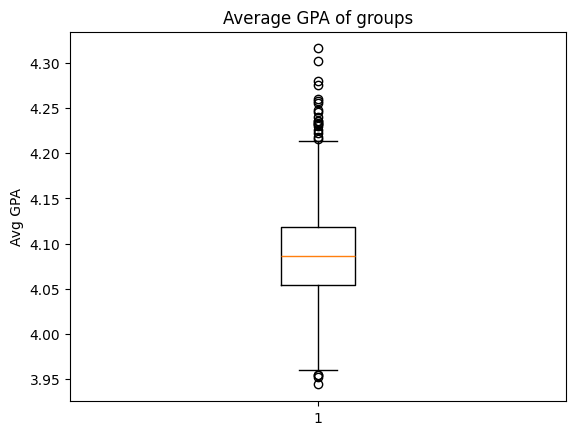

In [104]:
dispAvgGPA()

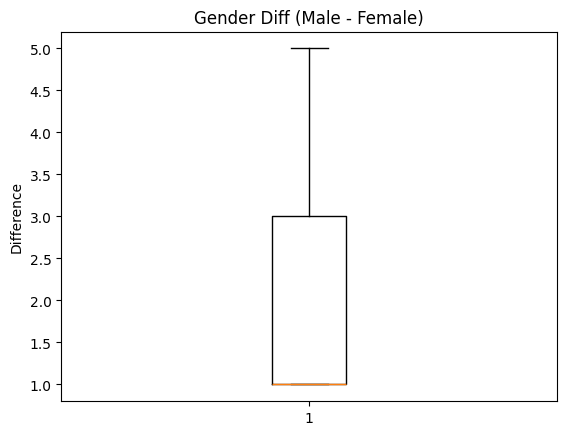

In [105]:
dispGenderDiff()

##### Analysis of gender difference plot:
As seen from the box and whiskers plot, the vast majority of the groups have a gender difference within 1-3. This means that most groups have an even balance of genders



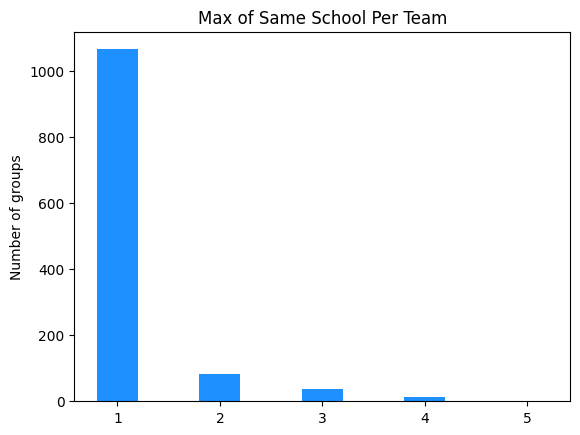

In [106]:
dispMaxSchools()

# Challenges and Issues

1. Visualizing how the data should be sorted
   - Since the data had a lot of nested lists and dictionaries (lists/dicts within a list/dict), accessing and sorting the data proved to be very challenging as it was difficult to understand. To help us with this challenge, we drew out tables and created flowcharts to better visualise how the data is stored. This made it easier to manipulate the data for our algorithm
2. Handling a large dataset without external libraries like numpy, pandas
3. Finding ways to optimize the algorithm
   - Used lambda function instead of custom merge sort (for time and space complexity concerns)
   - Use of defaultdict() from collections library for easier appending of data into dictionary
4. Deciding how to decompose program into appropriate functions


# Conclusion

1. Organized our code into modular functions 
     - Improves readability and maintainability
     - Isolated testing of individual components
     - Streamline the process of identifying and fixing any issues
2. Algorithm considers and sorts based on all given criteria such as school affiliation, gender, and GPA, rather than using random allocation methods
3. Include built-in error handling to manage potential issues such as empty input or invalid data types